# Использование `K-means` для сжатия


Еще одно полезное применение кластеризации — сжатие изображений. Схема до удивления проста: похожие, рядом расположенные цвета, стоит объединить в один цвет. Давайте провернем это самостоятельно.

Считайте изображение из вашего индивидуального задания.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
import cv2

In [2]:
from google.colab import drive
drive.mount('/content/drive')
way = "/content/drive/MyDrive/Colab_Notebooks/data_science/datasets/"

Mounted at /content/drive


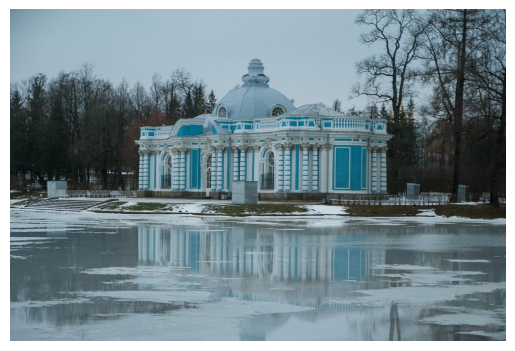

In [17]:
rand_st = 12


img = cv2.imread(way + 'spb_barocco.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(img)

Перед нами трехканальное (RGB) изображение. Вычислите среднее значение интенсивности пикселей по всем каналам.

In [7]:
mean_val = cv2.mean(img)
mean_val = mean_val[:3]
print(np.mean(mean_val))
print(img.mean())

121.34244974201715
121.34244974201714


Нормируйте значения интенсивностей пикселей, разделив все значения на $255$. Вычислите среднее значение интенсивности пикселей по всем каналам после проделанного преобразования.

In [8]:
img2 = img / 255
img2.mean()

0.4758527440863417

Давайте убедимся в том, что исходное пространство цветов, насчитывающее около $16$ миллионов возможных состояний ($256^3$), слишком велико, и его размерность можно понижать. Для наглядности построим лишь некоторые подвыборки зависимостей значений интенсивностей и лишь на случайном поднаборе пикселей.

«Распрямите» изображение так, чтобы <code>.shape</code> соответствущего массива имел вид <code>(высота * ширина, 3)</code>

In [13]:
# Функция принимает на вход "распрямленный" массив, соответствующий изображению

def plot_pixels(data, colors=None, N=10000):
    if colors is None:
        colors = data

    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

In [9]:
img2.shape

(856, 1280, 3)

In [29]:
height = img2.shape[0]
width = img2.shape[1]

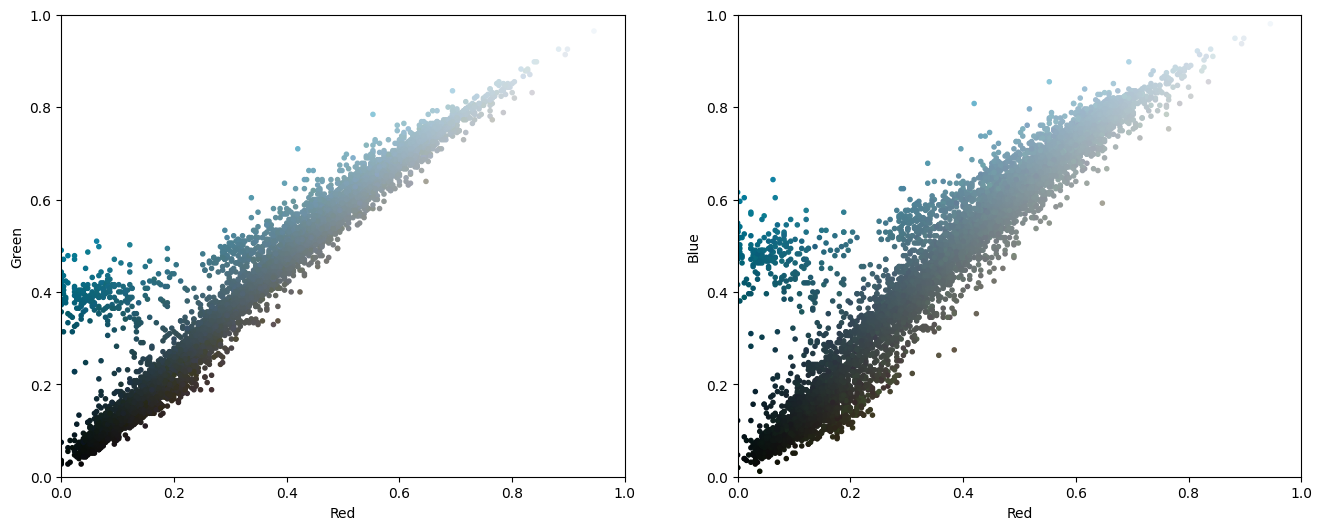

In [30]:
flattened_img = img2.reshape(height * width, 3)
plot_pixels(flattened_img)

Переведем 16 миллионов возможностей во всего-навсего 16 возможностей, используя <code>K-means</code>. Правда, чтобы ускорить работу алгоритма, мы будем использовать <a href="https://scikit-learn.org/stable/modules/generated/sklearn.cluster.MiniBatchKMeans.html"><code>K-means</code> на батчах</a> — поднаборах данных. Заодно увидим, портит ли это результат.

Обучите модель <code>MiniBatchKMeans</code> на нормированном и «распрямленном» изображении с параметрами, указанными в вашем задании.

В изображении замените значения цветов каждого пикселя на значения координат центроида кластера к которому был отнесен этот пиксель. Постройте графики зависимостей цветов при помощи <code>plot_pixels()</code> с новой палитрой (параметр <code>colors</code>)


In [31]:
from sklearn.cluster import MiniBatchKMeans

mb_kmeans = MiniBatchKMeans(n_clusters=16, random_state=rand_st)
mb_kmeans.fit(flattened_img)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


MiniBatchKMeans(n_clusters=16, random_state=12)

In [32]:
mb_kmeans.cluster_centers_

array([[0.32030198, 0.49088301, 0.55365325],
       [0.65009422, 0.73930097, 0.788702  ],
       [0.19464392, 0.22679377, 0.22523917],
       [0.23760447, 0.2922737 , 0.30862122],
       [0.5400751 , 0.63045348, 0.67171993],
       [0.07364049, 0.38933684, 0.47229973],
       [0.06124477, 0.08109306, 0.07557538],
       [0.44089557, 0.52575357, 0.55971067],
       [0.32967913, 0.39877078, 0.42420054],
       [0.59432976, 0.68282278, 0.7261095 ],
       [0.38706008, 0.45965792, 0.4874174 ],
       [0.1503368 , 0.17021466, 0.16172547],
       [0.76059295, 0.82137932, 0.85155653],
       [0.28411586, 0.34843947, 0.37094428],
       [0.48801046, 0.58002301, 0.6199919 ],
       [0.10625298, 0.12426406, 0.11590722]])

In [33]:
new_colors = mb_kmeans.cluster_centers_[mb_kmeans.labels_]
new_colors

array([[0.44089557, 0.52575357, 0.55971067],
       [0.48801046, 0.58002301, 0.6199919 ],
       [0.48801046, 0.58002301, 0.6199919 ],
       ...,
       [0.28411586, 0.34843947, 0.37094428],
       [0.32967913, 0.39877078, 0.42420054],
       [0.32967913, 0.39877078, 0.42420054]])

Вычислите среднее значение интенсивности пикселей полученного изображения.

In [37]:
new_colors.mean()

0.4754014758648951

Выберите номер изображения, соответствующего палитре из $16$ цветов.

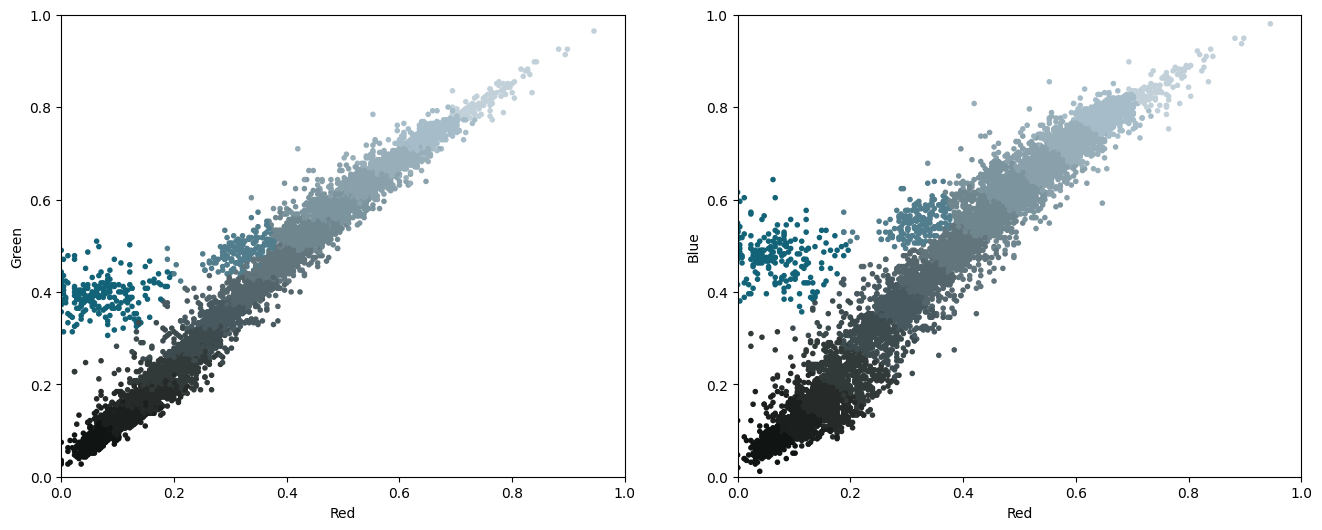

In [34]:
plot_pixels(flattened_img, colors = new_colors)

Пора смотреть на результат! Постройте рядом оригинальное изображение и изображение, в котором используется лишь $16$ цветов.

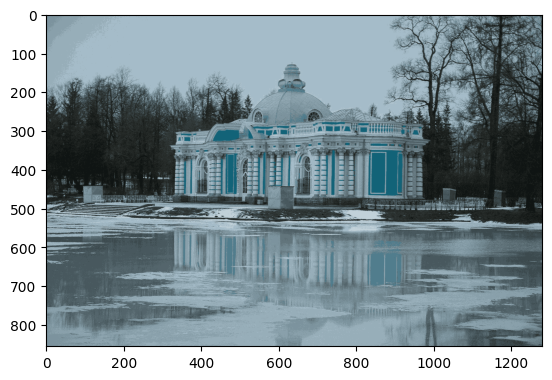

In [38]:
plt.imshow(new_colors.reshape(height, width, 3))

Постройте изображение размера $4 \times 4$ на основе полученных $16$ цветов. Выберите верное изображение.

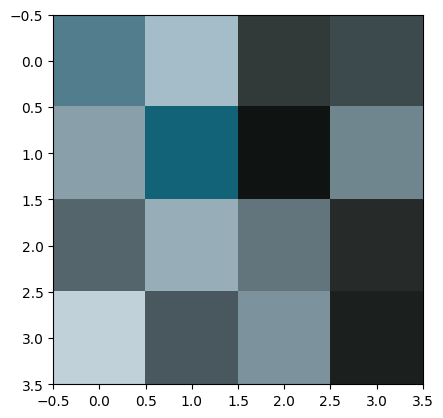

In [39]:
palette_new_colors = mb_kmeans.cluster_centers_.reshape(4, 4, 3)
plt.imshow(palette_new_colors)